# Pizza Sales Analysis 

### In this workbook we are doing analysis based on the business questions to underestand the sales of the pizza.we are providing analysis for the queries that can help business to improvve there sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
order_det=pd.read_csv('D:\Python\Pizza_sales\order_details.csv')
orders=pd.read_csv('D:\Python\Pizza_sales\orders.csv',encoding='ANSI')
pizza_types=pd.read_csv('D:\Python\Pizza_sales\pizza_types.csv',encoding='ANSI')
pizzas=pd.read_csv('D:\Python\Pizza_sales\pizzas.csv',encoding='ANSI')

In [3]:
order_det.head(2)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1


In [4]:
orders.head(2)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40


In [5]:
pizza_types.head(2)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [6]:
pizzas.head(2)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75


In [7]:
#### joining order_det and orders
order_all=pd.merge(left=order_det,right=orders,left_on='order_id',right_on='order_id')

In [8]:
####joining pizza_types and pizzas
pizza_all=pd.merge(left=pizza_types,right=pizzas,left_on='pizza_type_id',right_on='pizza_type_id')

In [9]:
final_order=pd.merge(left=order_all,right=pizza_all,left_on='pizza_id',right_on='pizza_id')

In [10]:
final_order.head(5)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25


In [11]:
final_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  size              48620 non-null  object 
 11  price             48620 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [12]:
final_order['date']=pd.to_datetime(final_order['date'])

In [13]:
final_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  object        
 6   pizza_type_id     48620 non-null  object        
 7   name              48620 non-null  object        
 8   category          48620 non-null  object        
 9   ingredients       48620 non-null  object        
 10  size              48620 non-null  object        
 11  price             48620 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.8+ MB


In [14]:
final_order['hour']=pd.to_datetime(final_order['time']).dt.hour

In [15]:
final_order['day']=final_order['date'].dt.day_name()

In [16]:
day_orders=final_order.groupby(by='day')['order_id'].count().reset_index()

<AxesSubplot:xlabel='day', ylabel='order_id'>

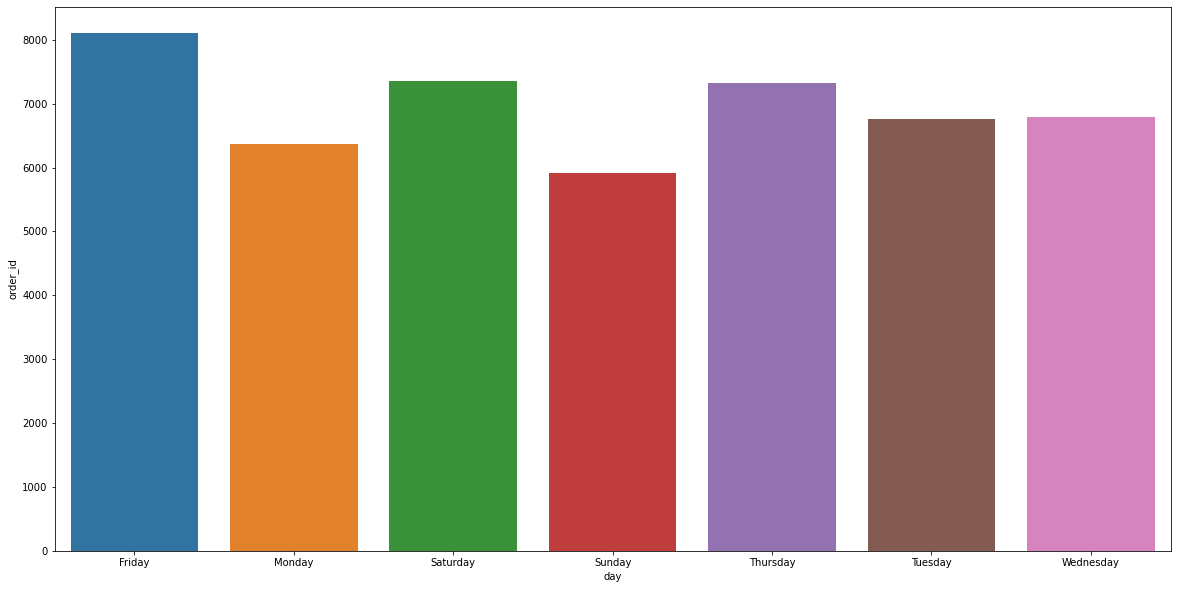

In [17]:
plt.figure(figsize=(20,10))

sns.barplot(x='day',y='order_id',data=day_orders)

### Analysis: from the graph shown above we can say that the Friday has the most of the orders in a week,because of reasons could be : last working day of the week,So we could give more offers on the Fridays and weekends to increase more sales.

In [18]:
peak_orders=final_order.groupby(by='hour')['order_id'].count().reset_index()

In [19]:
peak_orders

,hour,order_id
0,9,4
1,10,17
2,11,2672
3,12,6543
4,13,6203
5,14,3521
6,15,3170
7,16,4185
8,17,5143
9,18,5359


<AxesSubplot:xlabel='hour', ylabel='order_id'>

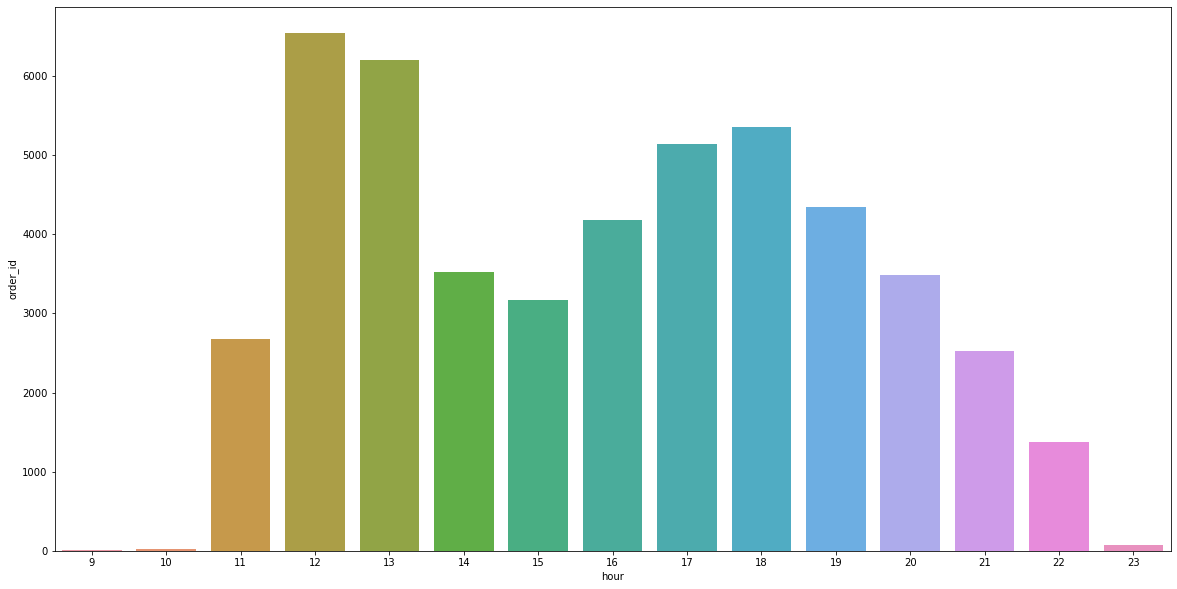

In [20]:
plt.figure(figsize=(20,10))

sns.barplot(x='hour',y='order_id',data=peak_orders)

#### Analysis: The analysis based on the peak hours ,in the afternoon mostly people orders the pizza due to the lunch hours.After noon ,the second period of peak is in evening 6pm to 8pm


#### How many pizzas are typically in an order?

In [21]:
ord_quant=final_order.groupby(by='order_id')['quantity'].sum().reset_index()

In [22]:
ord_quant

,order_id,quantity
0,1,1
1,2,5
2,3,2
3,4,1
4,5,1
...,...,...
21345,21346,4
21346,21347,4
21347,21348,3
21348,21349,1


In [23]:
order_quant=pd.DataFrame(ord_quant['quantity'].value_counts())

In [24]:
order_quant

,quantity
1,8111
2,6152
3,3207
4,3122
5,145
6,80
8,67
14,66
9,64
7,61


<AxesSubplot:ylabel='quantity'>

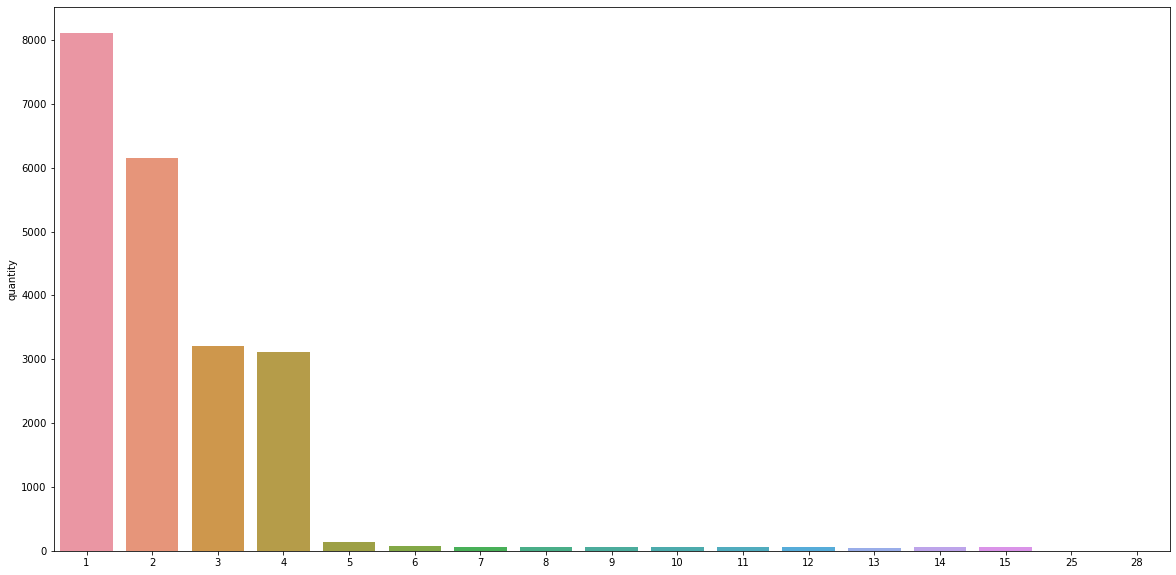

In [25]:
plt.figure(figsize=(20,10))

sns.barplot(x=order_quant.index,y='quantity',data=order_quant)

### Analysis : The preferable quantity of ordering the pizza by the customers is the cocunt of 1

#### Do we have any bestsellers?

In [26]:
bestseller=final_order.groupby(by='name')['quantity'].sum().reset_index()

In [27]:
bestseller=bestseller.sort_values(by='quantity',ascending=False).head(10)

In [28]:
bestseller

,name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371
4,The California Chicken Pizza,2370
23,The Sicilian Pizza,1938
26,The Spicy Italian Pizza,1924
25,The Southwest Chicken Pizza,1917
1,The Big Meat Pizza,1914


<AxesSubplot:xlabel='name', ylabel='quantity'>

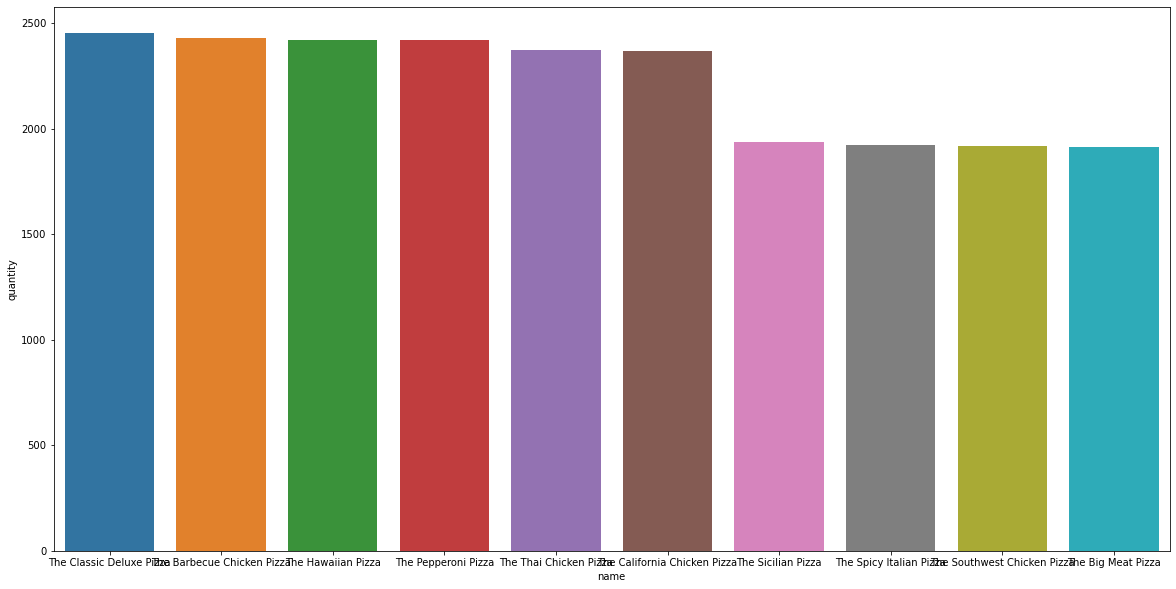

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='name',y='quantity',data=bestseller)

#### Analysis: best seller pizza is "The Classic Deluxe Pizza" .the other pizzas like "Barbeque Chicken" ,"Hawain Pizzas".

#### How much money did we make this year? Can we indentify any seasonality in the sales?

In [30]:
monthly_sales=pd.DataFrame(final_order.groupby(by=final_order['date'].dt.month_name())['price'].sum())

In [31]:
monthly_sales=monthly_sales.reset_index()

In [32]:
monthly_sales

,date,price
0,April,67286.20
1,August,67068.80
2,December,63450.00
3,February,64067.40
4,January,68472.70
5,July,71027.45
6,June,66796.30
7,March,69198.00
8,May,69939.35
9,November,69054.00


In [33]:
monthly_sales['date_month']=monthly_sales['date'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
                       'October':10,'November':11,'December':12})

In [34]:
monthly_sales=monthly_sales.sort_values(by='date_month',ascending=True)

In [35]:
monthly_sales

,date,price,date_month
4,January,68472.70,1
3,February,64067.40,2
7,March,69198.00,3
0,April,67286.20,4
8,May,69939.35,5
6,June,66796.30,6
5,July,71027.45,7
1,August,67068.80,8
11,September,63018.00,9
10,October,62566.50,10


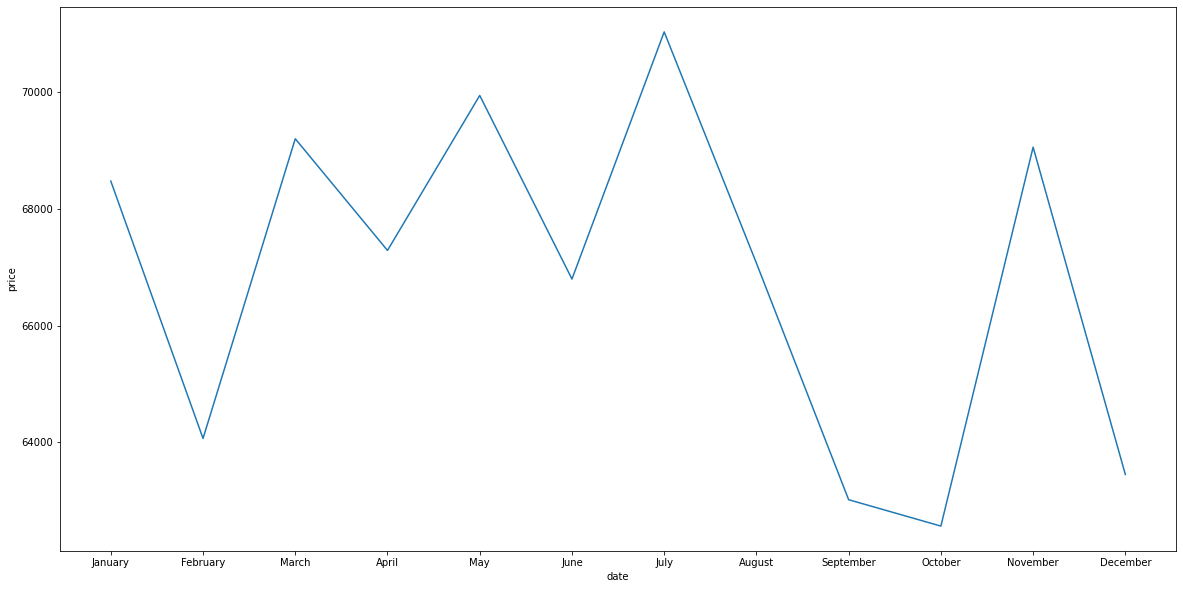

In [36]:
plt.figure(figsize=(20,10))

sns.lineplot(x='date',y='price',data=monthly_sales)
plt.show()

#### Analysis: In the month of May the sales of pizza was high,the reason could be the summer break ,duing septmber and october we had to face the decline in the sales,but in November the sales went up.

### Are there any pizzas we should take of the menu, or any promotions we could leverage?

In [37]:
final_order.head(5)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price,hour,day
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,11,Thursday
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,12,Friday
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,14,Saturday
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,16,Saturday
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,20,Sunday


In [38]:
take_of=final_order.groupby(by='name')['price'].sum().sort_values().reset_index()

In [44]:
least_perform=take_of.head(10)

In [43]:
avg_sales=take_of['price'].mean()

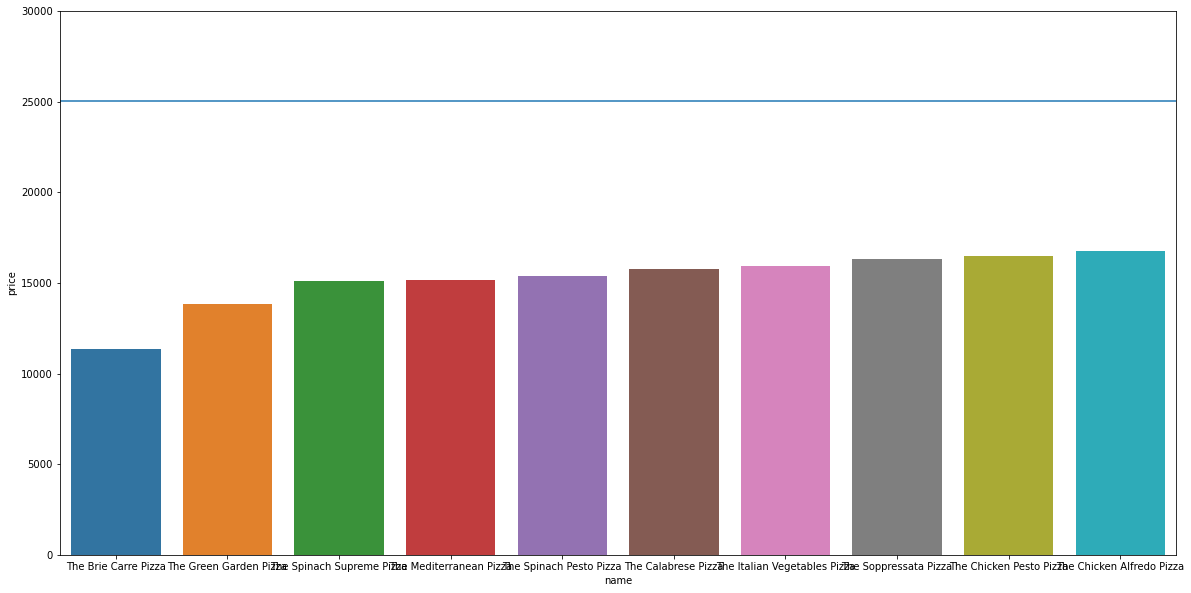

In [53]:
plt.figure(figsize=(20,10))

graph=sns.barplot(x='name',y='price',data=least_perform)
plt.ylim(0,30000)
graph.axhline(avg_sales)

### Analysis: these are the pizza's which are not contributing much in the sales,as we can see the average line of the sales whihc is at ($25k),these all pizaa types are the lest performers and are below average in sales.company should give any kind of promotional offeres to thhe cusotmers so that the atleast some of them could move to the above average sales.